Zack Wang

For starters, we need to import the csv data. We're going to be using a Python Jupyter Notebook and pandas library because that is probably what I'm most familiar with, and it does the job quite nicely. For the first couple of questions, we just need to use the built-in functions of pandas to read in the data.

Question 1.a) We want to import the data, naming the entire table df. Then, we simply select the header of "artist", and use pandas built-in unique function to return a list of unique artists. Taking the length of that list, we can return how many unique artists there are throughout the table. 

In [88]:
#q 1.a)
import pandas as pd
df = pd.read_csv('chart2000-songmonth-0-3-0054.csv')
unique_artists = df['artist'].unique()
print(unique_artists)
len(unique_artists)

#we have 1721 unique artists on the list

['Rob Thomas & Santana' 'Christina Aguilera' 'Savage Garden' ...
 'Chris Brown & Drake' 'Lee Brice' 'Meduza & Goodboys']


1721

Question 1.b) follows the same logic. We select the header to be "songs", and find the length of the list formed from the unique elements of songs. 

In [89]:
#q 1.b)
unique_songs = df['song'].unique()
print(unique_songs)
len(unique_songs)

#We have 2964 unique songs on the list

['Smooth' 'What A Girl Wants' 'I Knew I Loved You' ...
 'You Need To Calm Down' 'Look What God Gave Her' 'Good As You']


2964

Question 2 is asking for the highest one-month score, indicated by the column with header 'score'. Looking at "Smooth" by Rob Thomas and Santana as an example, we can tell that the aggregate-score does indeed change by each month, but the score of the first month has no immediate on the other. Thus, to find the highest one-month score, it is a matter of finding the item with the maximum/largest integer in the score, and retrieving the rest of the info from the index/spot of that maximum. 

In [90]:
#q 2.a)
scores = df['score']
max_score = max(scores)
print(max_score)
#Because we are assuming that this returned value 5524.53 is the only max, we can continue. If this was not the case, we would
#need to construct a list, then populate that with the tied maximums (although that doesn't make much sense in this context).
#So now simply retrieve the index using pandas.
max_score = df.score.idxmax()
#get the location/index of the highest score
print(max_score)
desired_info = df.iloc[max_score]
print(desired_info)

5524.53
2550
month                         Apr 2004
position                             1
artist      Usher, Lil' Jon & Ludacris
song                             Yeah!
score                          5524.53
us                                   1
uk                                   1
de                                   1
fr                                   1
ca                                   -
au                                   1
Name: 2550, dtype: object


So to answer question 2, we have the highest one-month score song to be "Yeah!" in April of 2004. Inputting the index of 2550, we know all the info from the 2550th item in the list. The artists for this song are Usher, Lil' Jon, and Ludacris. 

Question 3 asks for information pertaining to only the items with song name "Safe And Sound". Then, we are going to make a new dataframe "only_safensound" that is made entirely from songs with that title. From there, we can extract how many times it was on the billboard (number of items in dataframe), the highest position (the minimum of the integer under "us", as well as the location of that highest position. We also check to see if there are any other artists with the song name "Safe And Sound", to verify we are referencing just the one song by Capital Cities.

In [91]:
only_safensound = df[df.song == 'Safe And Sound']
print(only_safensound)
#just to be sure, check to see if the unique artists of the df only_safensound is EXCLUSIVELY Capital Cities, and no other artists
print(only_safensound['artist'].unique())
#checks out, so we have our new dataframe with all the information we need
print(len(only_safensound[only_safensound.us != '-']))
#q 3.a) We can see that 'Safe and Sound' by Capital Cities is on the Billboard 10 times in the US, so it was on the charts 10 times.

         month  position          artist            song     score  us  uk  \
8022  May 2013        23  Capital Cities  Safe And Sound   786.373  97   -   
8067  Jun 2013        18  Capital Cities  Safe And Sound   942.385  56   -   
8112  Jul 2013        13  Capital Cities  Safe And Sound  1073.003  19   -   
8159  Aug 2013        10  Capital Cities  Safe And Sound  1193.620   9   -   
8212  Sep 2013        13  Capital Cities  Safe And Sound  1151.508   8  42   
8263  Oct 2013        14  Capital Cities  Safe And Sound  1197.791  10  42   
8320  Nov 2013        21  Capital Cities  Safe And Sound   933.439  12   -   
8377  Dec 2013        28  Capital Cities  Safe And Sound   699.912  21   -   
8433  Jan 2014        34  Capital Cities  Safe And Sound   724.637  28   -   
8493  Feb 2014        44  Capital Cities  Safe And Sound   555.503  36   -   

      de  fr  ca  au  
8022   1   -   -   -  
8067   2   -  36   -  
8112   3  98  17   -  
8159   9  41   7   -  
8212  19  19  11   -  
826

In [92]:
#q 3.b) requires us to find the minimum number present in the U.S column, as that gives the highest position it has attained. 
# Note a workaround, converting the numbers to float. Otherwise pandas doesn't work to find the minimum.
# with this location, we can extract everything we need to know. We know the 8212th item in the original dataframe will give us
# the peak US position and the month it was achieved
highest_position_us = only_safensound[['us']].astype(float).idxmin()
print(highest_position_us)
position_info_sns = df.iloc[highest_position_us]
print(position_info_sns)

us    8212
dtype: int64
         month  position          artist            song     score us  uk  de  \
8212  Sep 2013        13  Capital Cities  Safe And Sound  1151.508  8  42  19   

      fr  ca au  
8212  19  11  -  


To answer the rest of Question 3, we can see that the song's peak US position was 8th, and that this was reached in September 2013. Note that this second chunk of code wasn't really necessary, as we could read it from the print statement of only_safensound, but it is still in good practice, in the off-case that only_safensound was too large to read manually. 

To answer Question 4, we need a means of calculating and comparing each artists' month-score. This can be done by counting the instances of each artist in the 'artist' column. Basically, tallying the frequency each name appears (while considering collaborations/combinations to be unique) is equivalent to tallying the month-score of each artist. Luckily, a libray known as 'collections' let's us do this exact thing. We import a function Counter, which allows us to aggregate the number of times each artist appears, and take the most common (or greatest number) of artist.

In [93]:
#q 4 
from collections import Counter
artists = df['artist']
Counter(artists).most_common(1)
#returning the most common artist in the entire dataframe

[('Rihanna', 123)]

From this, we can see that Rihanna has the highest month-score, with a month-score of 123. This is because she appears 123 times throughout the artist column, meaning she has a song/songs each month totalling to 123. 

For Question 5, we need to make another dataframe, in which the only artist is Drake and the only value for 'ca' is 1. We can use a similar technique from question 3, in which we specified the range we were looking for. Then, the number of items in this new dataframe should tell us how many #1 hits Drake has had specifically in Canada. 

In [94]:
#q 5
drake_songs = df[df.artist == 'Drake']
drake_no_one = drake_songs[drake_songs.ca == '1']
print(drake_no_one)
print(len(drake_no_one))
#we have that drake has 10 instances of being #1 in Canada. In the event that the question is asking for unique ~songs~ then we have 4 
#songs being number one hits. This can be seen by taking the unique elements of drake_no_one if we had too large a dataframe to read
#normally.

          month  position artist            song     score us  uk  de  fr ca  \
10851  Feb 2018         2  Drake      God's Plan  3117.276  1   1   3   4  1   
10900  Mar 2018         1  Drake      God's Plan  3905.111  1   1   1   4  1   
10950  Apr 2018         1  Drake      God's Plan  3193.896  1  10   4  14  1   
10974  Apr 2018        25  Drake   Nice For What  1243.764  1   1   9  28  1   
11000  May 2018         1  Drake   Nice For What  2838.415  1   2  14  42  1   
11050  Jun 2018         1  Drake   Nice For What  2535.971  1   2  45  44  1   
11108  Jul 2018         9  Drake  In My Feelings  1857.868  1   1   4  11  1   
11122  Jul 2018        23  Drake         Nonstop  1236.457  2   4  28  96  1   
11150  Aug 2018         1  Drake  In My Feelings  3461.706  1   1   4   5  1   
11201  Sep 2018         2  Drake  In My Feelings  2748.759  1   2  17  14  1   

      au  
10851  1  
10900  1  
10950  1  
10974  1  
11000  1  
11050  4  
11108  1  
11122  5  
11150  1  
11201  2 

From this, we can see that Drake has had 10 instances of being number 1 in Canada, with 4 unique songs being number one hits. 

For Question 6, we need to get a dataframe that contains all songs by Lady Gaga. From there, we simply search for the one with a null value for Australia. This is the same process as Question 5.

In [95]:
gaga_songs = df[df.artist == 'Lady GaGa'] #note letter case needs to be correct, relative to csv file
not_in_australia = gaga_songs[gaga_songs.au == '-']
songs_not_in_aust = not_in_australia['song'].unique()
print(songs_not_in_aust)

# we have 'Poker Face' 'LoveGame' 'Paparazzi' 'Alejandro' 'You & I' 'Marry The Night' 'Applause' being songs on the chart, but not 
# in Australia specifically

['Poker Face' 'LoveGame' 'Paparazzi' 'Alejandro' 'You & I'
 'Marry The Night' 'Applause']


To answer Question 6, we have seven songs that are, at some point, featured on the Billboard, but not in Australia (they are assigned a null value for au). These songs are 'Poker Face', 'LoveGame', 'Paparazzi', 'Alejandro', 'You & I', 'Marry The Night', and 'Applause'. 

For Question 7, we need to do a bit more rigorous filtering and counting than in Question 4. We will make a new dataframe, containing exclusively Ariana Grande songs, then count the frequency of month names, to see which has the highest song count per month. 

In [96]:
grande_songs = df[df.artist == 'Ariana Grande']
ariana_months = grande_songs['month']
Counter(ariana_months).most_common(5)
# we see that February 2019 has the highest frequency, indicating that for that month 4 of Ariana Grande's songs were on the Billboard
# NOTE the difference in notation of what we are matching for the month string, it must be in this format as that is what the csv 
# recognizes the month to be
top_month_songs = grande_songs[grande_songs.month == 'Feb 2019']
print(top_month_songs)

          month  position         artist                                song  \
11450  Feb 2019         1  Ariana Grande                             7 Rings   
11457  Feb 2019         8  Ariana Grande                       Thank U, Next   
11482  Feb 2019        33  Ariana Grande  Break Up With Your Girlfriend, I'm   
11499  Feb 2019        50  Ariana Grande                            Breathin   

          score  us uk  de  fr  ca au  
11450  3688.939   1  1   4   2   1  1  
11457  1859.125   3  -  34  19   4  5  
11482   974.459   2  1   8  16   2  2  
11499   674.022  18  -   -   -  27  -  


To answer Question 7, we have that February 2019 was the month in which Ariana Grande had the most songs on the Billboard, relative to all her songs shown. In February 2019, there were 4 songs on the Billboard for Grande: '7 Rings', 'Thank U, Next', 'Break Up With Your Girlfriend, I'm', and 'Breathin'. The highest position of these is '7 Rings', ranked number 1 in the U.S for this month. Again, this can be seen visually, but for a larger dataset what we could do is the same process as Question 5, taking the minimum value of the 'us' column and extracting information from there. 

In Question 8, we first need to restrict our dataframe to be only from January 2013 to December 2017. This poses a tricky challenge, as the dates are represented by strings, like "Jan 2010". If it were integers, we could find a range of numerical inputs, with <= and >= operators. Thus, we need a workaround. Let's search for the first item of Jan 2013, the last of Dec 2017, and use the locations to trim the dataframe.

In [97]:
months = df['month']
start = (df['month'] == 'Jan 2013').idxmax()
print(start)
stop = months.where(months == 'Dec 2017').last_valid_index()
print(stop)
#manual checking
#print(df.iloc[7799])
#print(df.iloc[7800])
#print(df.iloc[10799])
#print(df.iloc[10800])
#checks out, the items directly outside of the bounds are those that tightly bound our date range
trimmed = df.loc[start:stop]

7800
10799


With this trimmed dataframe, we can filter it further, counting only unique songs. From there, we do a Counter, similar to Question 4 to determine the top 10 artists in this dataframe. Once we have this, we can make a graph. 

In [98]:
trimmed_again = trimmed.drop_duplicates(subset = 'song', keep = 'first')
#the ~first specification isn't really important, as we are simply counting the number of unique songs
#if we cared about order, we would first need to ~sort the duplicates based on some other quality, and then decide to keep first or last
artist_top10 = Counter(trimmed_again['artist']).most_common(10)
print(artist_top10)
artists,num_songs = zip(*artist_top10)

[('Taylor Swift', 10), ('One Direction', 10), ('Ed Sheeran', 10), ('Rihanna', 8), ('Bruno Mars', 8), ('Drake', 8), ('Selena Gomez', 7), ('Avicii', 7), ('Maroon 5', 6), ('Imagine Dragons', 6)]


To answer Question 8.a) the top 10 artists, in terms of unique songs on the Billboard from 2013 to 2017, were (in order) Taylor Swift, One Direction, Ed Sheeran, Rihanna, Bruno Mars, Drake, Selena Gomez, Avicii, Maroon 5, and Imagine Dragons. 

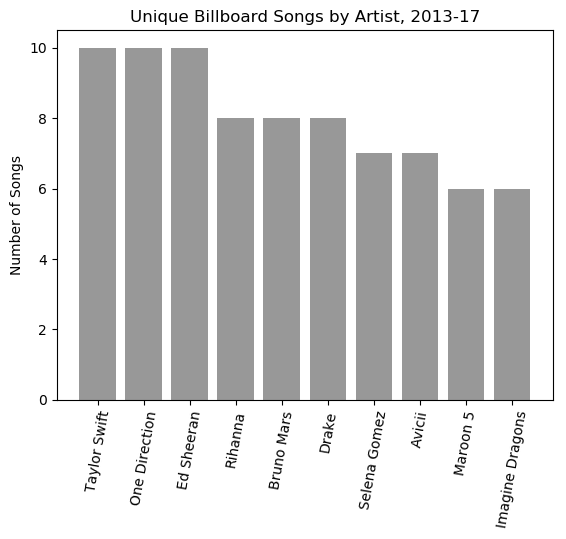

In [99]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(artists))
plt.bar(y_pos, num_songs, align='center', color = (.2, .2, .2, .5))
plt.xticks(y_pos, artists)
plt.ylabel('Number of Songs')
plt.title('Unique Billboard Songs by Artist, 2013-17')
plt.xticks(rotation=80)

plt.show()

Here we show the results of our filtering. I rotated the x-labels to make sure the names did not overlap. I kept the colors a generally neutral one, as I wasn't sure how to pick 10 distinct colors per artist. If we wanted to, say use official band colors, we would define colors to be a list of symbols for each. That's all the questions answered!